In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from scipy.special import entr
from sklearn.metrics import accuracy_score
import operator
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [37]:
# this function to prepare the contour plot
def PlotContour(TrainingData, TestingData, clf):
    # define bounds of the domain
    Data=np.r_[TrainingData,TestingData]
    min1, max1 = Data[:, 0].min()-1, Data[:, 0].max()+1
    min2, max2 = Data[:, 1].min()-1, Data[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = clf.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    return xx, yy, zz

In [32]:
# Prepare training and testing
TrainingData = pd.DataFrame(np.transpose(np.array([[1,2,6], [1,4,4]])))
TrainingLabels=np.array([1,2,3])
TrainingData=TrainingData.to_numpy()

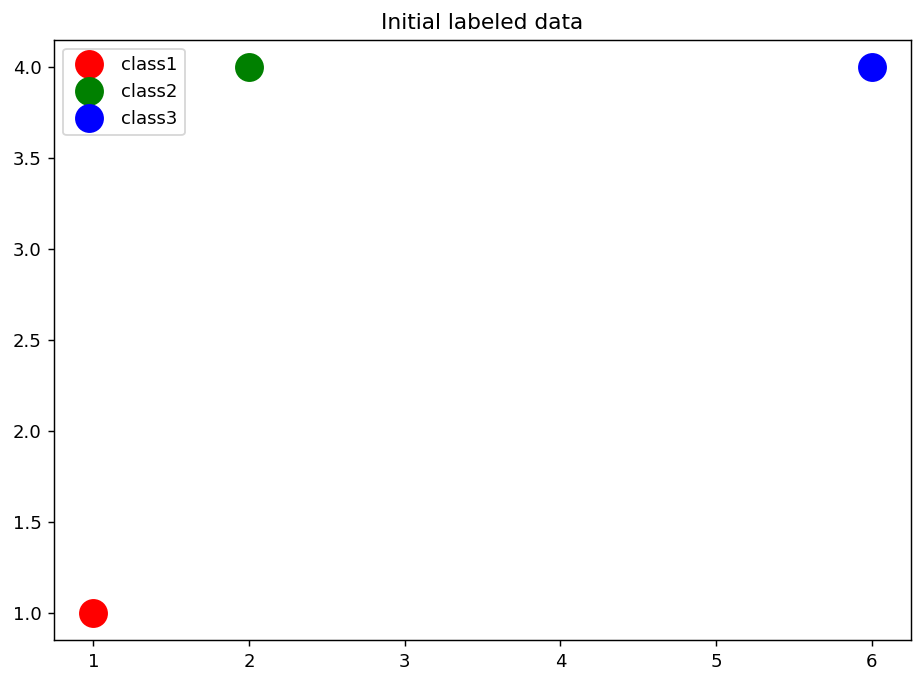

In [33]:
# Plot our training data
plt.figure(figsize=(8.5, 6), dpi=130)
plt.title("Initial labeled data")
plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=15, label='class1')
plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=15, label='class2')
plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=15, label='class3')
plt.legend()
plt.show()

In [34]:
# the pool of unlabeled data points
TestingData = pd.DataFrame(np.transpose(np.array([[2,1,2,3,3,2,1,5,6,4], [1,2,2,2,3,3,4,3,2,3]])))
TestingLabels=np.array([1,1,1,1,2,2,2,3,3,3])
TestingData=TestingData.to_numpy()

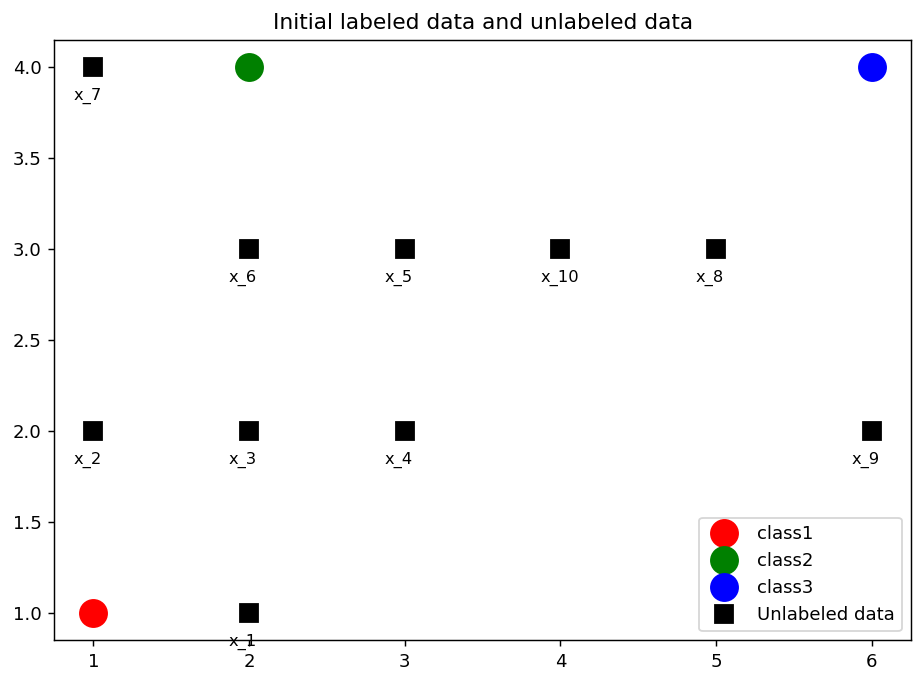

In [35]:
# Plot our training/labeled data and unlabeled data
plt.figure(figsize=(8.5, 6), dpi=130)
plt.title("Initial labeled data and unlabeled data")
plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=15, label='class1')
plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=15, label='class2')
plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=15, label='class3')
plt.plot(np.transpose(TestingData[:,0]),np.transpose(TestingData[:,1]), 'ks', markersize=10, label='Unlabeled data')
for i in range(TestingData.shape[0]):
    Text='x_' + str(i+1)
    plt.text(TestingData[i,0]-0.13, TestingData[i,1]-0.18,Text,fontsize=9)
plt.legend()
plt.show()

In [36]:
# train a model on TrainingData, calculate the accuracy of TestingData
clf = RandomForestClassifier(n_estimators = 10, random_state = 1) 
clf.fit(TrainingData, TrainingLabels) 
# calculate prediction probabilities of the unlabeled data
predictions = clf.predict(TestingData) 
Accuracy= np.array(accuracy_score(predictions, TestingLabels))
Accuracy=Accuracy.reshape((1,1))
predicted_probs = clf.predict_proba(TestingData) 
#print(predicted_probs) 
entropy_array = entr(predicted_probs).sum(axis=1)
for i in range(len(entropy_array)):
    print('Predicted probability of the ' + str(i+1)  + 'th unlabeled points is :' + str(predicted_probs[i]) + ' with Entropy ' + str(entropy_array[i]))

Predicted probability of the 1th unlabeled points is :[0.1 0.8 0.1] with Entropy 0.639031859650177
Predicted probability of the 2th unlabeled points is :[0.6 0.3 0.1] with Entropy 0.8979457248567797
Predicted probability of the 3th unlabeled points is :[0.1 0.8 0.1] with Entropy 0.639031859650177
Predicted probability of the 4th unlabeled points is :[0.1 0.8 0.1] with Entropy 0.639031859650177
Predicted probability of the 5th unlabeled points is :[0.1 0.8 0.1] with Entropy 0.639031859650177
Predicted probability of the 6th unlabeled points is :[0.1 0.8 0.1] with Entropy 0.639031859650177
Predicted probability of the 7th unlabeled points is :[0.6 0.3 0.1] with Entropy 0.8979457248567797
Predicted probability of the 8th unlabeled points is :[0.1 0.3 0.6] with Entropy 0.8979457248567797
Predicted probability of the 9th unlabeled points is :[0.1 0.3 0.6] with Entropy 0.8979457248567797
Predicted probability of the 10th unlabeled points is :[0.1 0.8 0.1] with Entropy 0.639031859650177


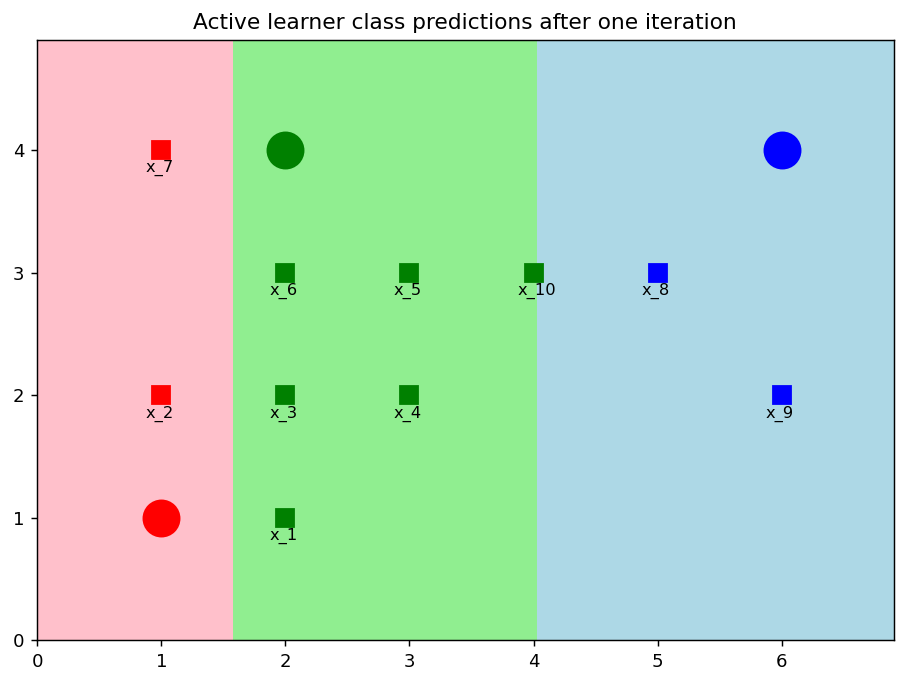

In [39]:
xx,yy,zz= PlotContour(TrainingData, TestingData,clf)
cmap = ListedColormap(['pink','lightgreen','lightblue'])
bounds = [0, 0.4,0.6, 1.1]
norm = BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(8.5, 6), dpi=130)
plt.title("Active learner class predictions after one iteration")
#plt.contourf(xx, yy, zz, [0,0.4,0.9] , colors = ['r','g','b'])
plt.contourf(xx, yy, zz, cmap=cmap)
plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=20)
plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=20)
plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=20)
plt.plot(np.transpose(TestingData[predictions==1,0]),np.transpose(TestingData[predictions==1,1]), 'rs', markersize=10)
plt.plot(np.transpose(TestingData[predictions==2,0]),np.transpose(TestingData[predictions==2,1]), 'gs', markersize=10)
plt.plot(np.transpose(TestingData[predictions==3,0]),np.transpose(TestingData[predictions==3,1]), 'bs', markersize=10)
for i in range(TestingData.shape[0]):
    Text='x_' + str(i+1)
    plt.text(TestingData[i,0]-0.13, TestingData[i,1]-0.18,Text,fontsize=9)
plt.show()

In [40]:
# select the most uncertain point (with max entropy) in the testing data 
index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))

# least confident
#uncertainties = np.amax(predicted_probs, axis=1)
#index=np.where(uncertainties == uncertainties.min())

# least margin
#predicted_probs.sort()
#uncertainties = predicted_probs[:, -1] - predicted_probs[:,-2]
#index=np.where(uncertainties == uncertainties.min())
print('The most uncertain point is No.', index+1)

The most uncertain point is No. 2


In [41]:
# add the new annotated point to the training data
TrainingData=np.concatenate((TrainingData,np.array(TestingData[index,:]).reshape(1,2)),axis=0)
TrainingLabels= np.append(TrainingLabels,np.array(TestingLabels[index]).reshape(1,1))

In [42]:
# delete the annotated point from the testing data (pool)
TestingData=np.delete(TestingData,index, axis=0)
TestingLabels=np.delete(TestingLabels,index, axis=0)

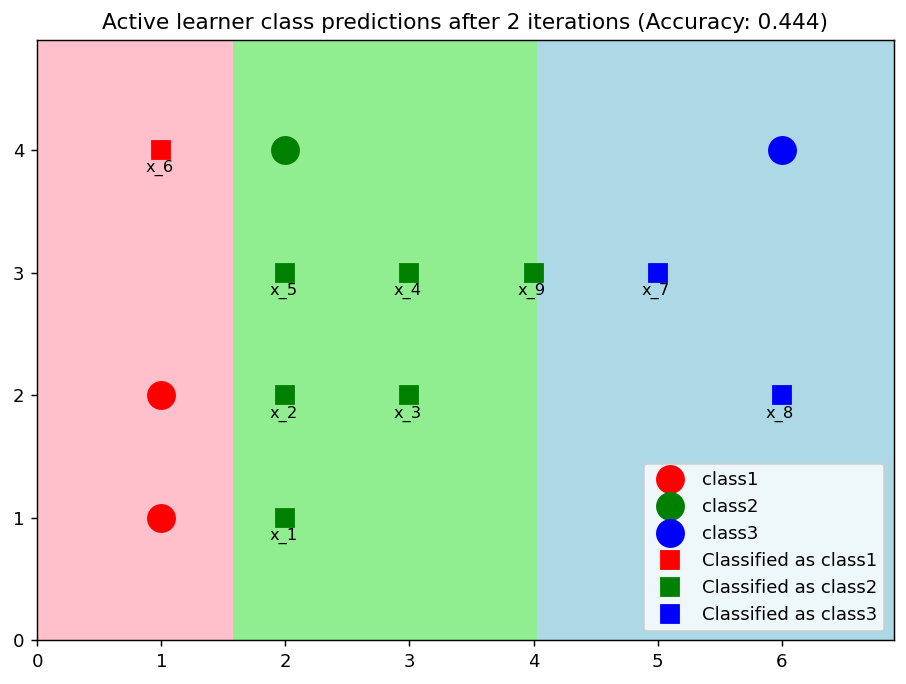

Predicted probability of the 1th unlabeled points is :[0.4 0.6 0. ] with Entropy 0.6730116670092565
Predicted probability of the 2th unlabeled points is :[0.4 0.6 0. ] with Entropy 0.6730116670092565
Predicted probability of the 3th unlabeled points is :[0.4 0.6 0. ] with Entropy 0.6730116670092565
Predicted probability of the 4th unlabeled points is :[0.3 0.6 0.1] with Entropy 0.8979457248567797
Predicted probability of the 5th unlabeled points is :[0.3 0.6 0.1] with Entropy 0.8979457248567797
Predicted probability of the 6th unlabeled points is :[0.7 0.2 0.1] with Entropy 0.8018185525433372
Predicted probability of the 7th unlabeled points is :[0.2 0.3 0.5] with Entropy 1.0296530140645737
Predicted probability of the 8th unlabeled points is :[0.3 0.3 0.4] with Entropy 1.0888999753452238
Predicted probability of the 9th unlabeled points is :[0.2 0.6 0.2] with Entropy 0.9502705392332347
The most uncertain point is No. 8


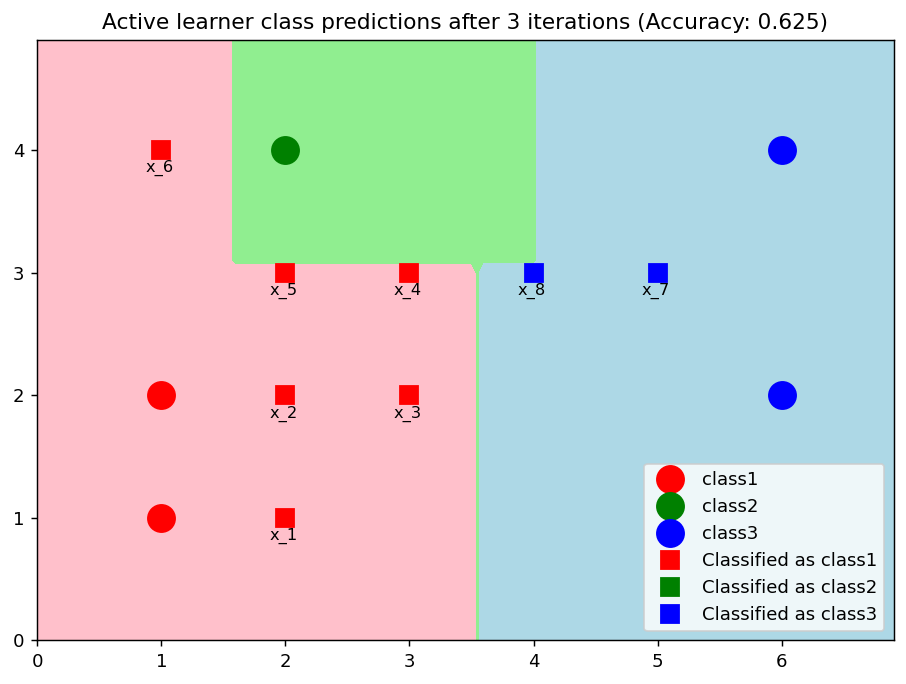

Predicted probability of the 1th unlabeled points is :[0.5 0.2 0.3] with Entropy 1.0296530140645737
Predicted probability of the 2th unlabeled points is :[0.5 0.2 0.3] with Entropy 1.0296530140645737
Predicted probability of the 3th unlabeled points is :[0.5 0.2 0.3] with Entropy 1.0296530140645737
Predicted probability of the 4th unlabeled points is :[0.5 0.2 0.3] with Entropy 1.0296530140645737
Predicted probability of the 5th unlabeled points is :[0.5 0.2 0.3] with Entropy 1.0296530140645737
Predicted probability of the 6th unlabeled points is :[0.6 0.2 0.2] with Entropy 0.9502705392332347
Predicted probability of the 7th unlabeled points is :[0.1 0.  0.9] with Entropy 0.3250829733914482
Predicted probability of the 8th unlabeled points is :[0.2 0.2 0.6] with Entropy 0.9502705392332347
The most uncertain point is No. 1


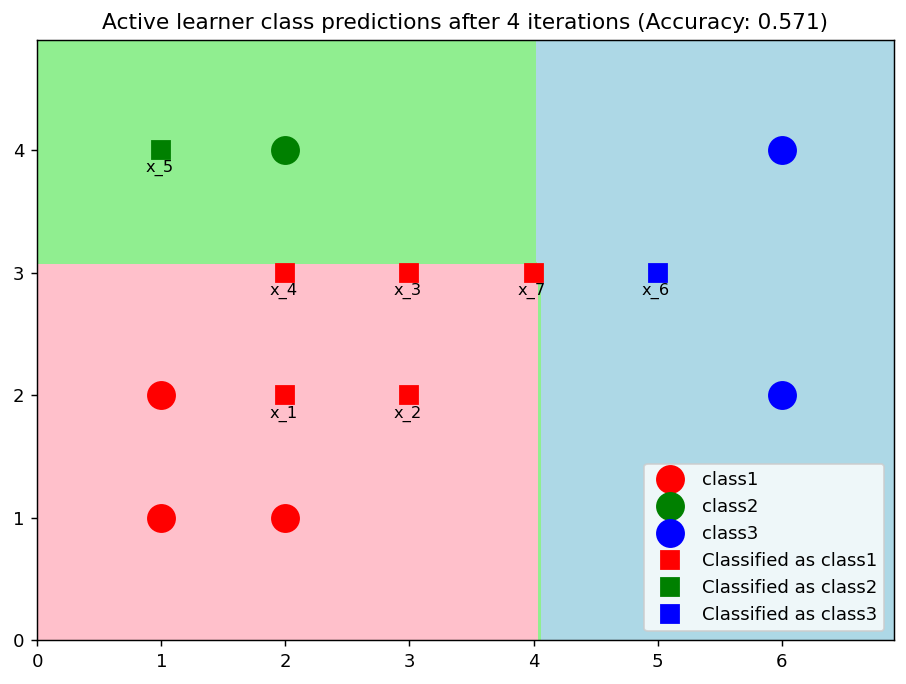

Predicted probability of the 1th unlabeled points is :[0.9 0.  0.1] with Entropy 0.3250829733914482
Predicted probability of the 2th unlabeled points is :[0.9 0.  0.1] with Entropy 0.3250829733914482
Predicted probability of the 3th unlabeled points is :[0.7 0.2 0.1] with Entropy 0.8018185525433372
Predicted probability of the 4th unlabeled points is :[0.7 0.2 0.1] with Entropy 0.8018185525433372
Predicted probability of the 5th unlabeled points is :[0.4 0.5 0.1] with Entropy 0.9433483923290391
Predicted probability of the 6th unlabeled points is :[0.1 0.  0.9] with Entropy 0.3250829733914482
Predicted probability of the 7th unlabeled points is :[0.5 0.2 0.3] with Entropy 1.0296530140645737
The most uncertain point is No. 7


In [43]:
# Iteratively annotate one point
for i in range(3):
    clf.fit(TrainingData, TrainingLabels) 
    predictions = clf.predict(TestingData) 
    Accuracy= np.append(Accuracy, np.array(accuracy_score(predictions, TestingLabels)))
    xx,yy,zz= PlotContour(TrainingData, TestingData,clf)
    plt.figure(figsize=(8.5, 6), dpi=130)
    plt.title("Active learner class predictions after " + str(i+2) +  " iterations (Accuracy: {Acc:.3f})".format(Acc=np.array(accuracy_score(predictions, TestingLabels))))
    plt.contourf(xx, yy, zz, cmap=cmap)
    plt.plot(np.transpose(TrainingData[TrainingLabels==1,0]),np.transpose(TrainingData[TrainingLabels==1,1]), 'ro', markersize=15, label='class1')
    plt.plot(np.transpose(TrainingData[TrainingLabels==2,0]),np.transpose(TrainingData[TrainingLabels==2,1]), 'go', markersize=15, label='class2')
    plt.plot(np.transpose(TrainingData[TrainingLabels==3,0]),np.transpose(TrainingData[TrainingLabels==3,1]), 'bo', markersize=15, label='class3')
    plt.plot(np.transpose(TestingData[predictions==1,0]),np.transpose(TestingData[predictions==1,1]), 'rs', markersize=10, label='Classified as class1')
    plt.plot(np.transpose(TestingData[predictions==2,0]),np.transpose(TestingData[predictions==2,1]), 'gs', markersize=10, label='Classified as class2')
    plt.plot(np.transpose(TestingData[predictions==3,0]),np.transpose(TestingData[predictions==3,1]), 'bs', markersize=10, label='Classified as class3')
    for i in range(TestingData.shape[0]):
        Text='x_' + str(i+1)
        plt.text(TestingData[i,0]-0.13, TestingData[i,1]-0.18,Text,fontsize=9)
    plt.legend()
    plt.show()
    
    predicted_probs = clf.predict_proba(TestingData) 
    #print(predicted_probs) 
    entropy_array = entr(predicted_probs).sum(axis=1)
    for j in range(len(entropy_array)):
        print('Predicted probability of the ' + str(j+1)  + 'th unlabeled points is :' + str(predicted_probs[j]) + ' with Entropy ' + str(entropy_array[j]))
    index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))
    print('The most uncertain point is No.', index+1)
    
    # add the new selected point to the labeled data
    TrainingData=np.concatenate((TrainingData,np.array(TestingData[index,:]).reshape(1,2)),axis=0)
    TrainingLabels= np.append(TrainingLabels,np.array(TestingLabels[index]).reshape(1,1))
    
    # delete the annotated point from the testing data (pool)
    TestingData=np.delete(TestingData,index, axis=0)
    TestingLabels=np.delete(TestingLabels,index, axis=0)

In [12]:
print(Accuracy)

[0.5        0.44444444 0.625      0.57142857]
